<a href="https://colab.research.google.com/github/jhildebrand22/HW-PS353/blob/main/12_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install whit_phys_util

     |████████████████████████████████| 10.9 MB 2.5 MB/s 


In [4]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import whit_phys_util as buc

Mounted at /content/drive


In [5]:
repo = buc.local_repository('https://github.com/jhildebrand22/HW-PS353')

Cloning repository from GitHub.


$$
\ddot\phi + 2\beta\dot\phi +\omega_0^2\sin\phi = \gamma\omega_0^2\cos\omega t
$$

In [6]:
#given params 
gam =0.9
omega = 2*np.pi
omega_0 = 1.5*omega
beta = omega_0/4 

phi0_1 = [0,0]
phi0_2 = [np.pi/2,0]
phi0_3 = [-np.pi/2,0]

In [7]:
def dwdt(t,w):
  phi = w[0]
  phi_dot = w[1]
  phi_ddot = -2*beta*phi_dot - omega_0**2*np.sin(phi) + gam*omega_0**2*np.cos(omega*t)
  return[phi_dot, phi_ddot] 

In [8]:
t = np.linspace(0,6,500)
tspan = [0,6]

In [9]:
sol1 = solve_ivp(dwdt,tspan,phi0_1,t_eval=t)
sol2 = solve_ivp(dwdt,tspan,phi0_2,t_eval=t)
sol3 = solve_ivp(dwdt,tspan,phi0_3,t_eval=t)

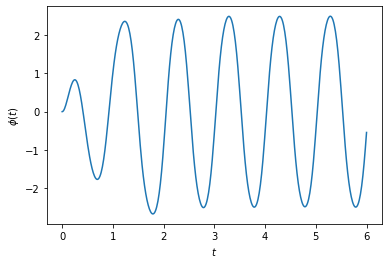

In [10]:
fig1,ax1 = plt.subplots()
ax1.plot(sol1.t,sol1.y[0])
ax1.set_xlabel('$t$')
ax1.set_ylabel('$\phi (t)$');

This graph agrees with figure 12.3 in the book, as after about two drive cycles the motion approaches a periodic oscillation where no information about the initial conditions can be found, as the long term motion is based purely on the driving. 

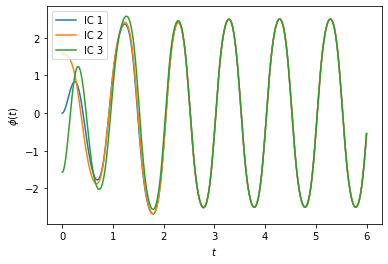

In [11]:
fig2, ax2 = plt.subplots()
ax2.plot(sol1.t, sol1.y[0])
ax2.plot(sol2.t, sol2.y[0])
ax2.plot(sol3.t, sol3.y[0])
ax2.set_xlabel('$t$')
ax2.set_ylabel('$\phi (t)$')
ax2.legend(['IC 1','IC 2', 'IC 3']);

No matter the initial conditions, the long term behavior of the driven damped pendulum approaches the same periodic behavior for this drive strength. 